In [59]:
!pip install -r requirements.txt

In [60]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.util import ngrams
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [61]:
# Load dataset
df = pd.read_csv('/content/daraz-code-mixed-product-reviews.csv')
# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
# Display the first few rows of the dataset
df.head()



,Sentiments,Reviews
0,negative,Stuff and design was totally changed. cheap qu...
1,positive,"i got my parxel before time,sorry for late rev..."
2,positive,So far so good..... Bought it only because it ...
3,neutral,Received as described but not suitable such ha...
4,positive,Received on time and in a safely packed box. T...


In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentiments  16990 non-null  object
 1   Reviews     16990 non-null  object
dtypes: object(2)
memory usage: 265.6+ KB


In [64]:
# Display basic statistics about the dataset
df.describe()


,Sentiments,Reviews
count,16990,16990
unique,3,16990
top,positive,Stuff and design was totally changed. cheap qu...
freq,10167,1


In [65]:
# Display the lat few rows of the dataset
df.tail()


,Sentiments,Reviews
16985,negative,It is doing nothing. I have wasted my money an...
16986,positive,Bht he achi prdct h Jo cheez dekhi whi mili ma...
16987,neutral,product quality is not very good but working o...
16988,positive,Very soft and cozy product perfect travel part...
16989,positive,Original product hai because original kay mic ...


In [66]:
# Display the types of columns of the dataset
df.dtypes


,0
Sentiments,object
Reviews,object


In [67]:
# Count unique values in each column
df.nunique()


,0
Sentiments,3
Reviews,16990


In [68]:
# Check for missing values
df.isnull().sum()


,0
Sentiments,0
Reviews,0


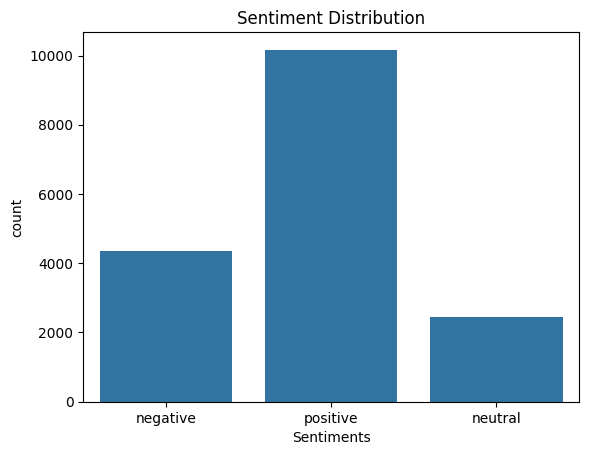

In [69]:
# Visualize the distribution of sentiments
sns.countplot(x='Sentiments', data=df)
plt.title('Sentiment Distribution')
plt.show()

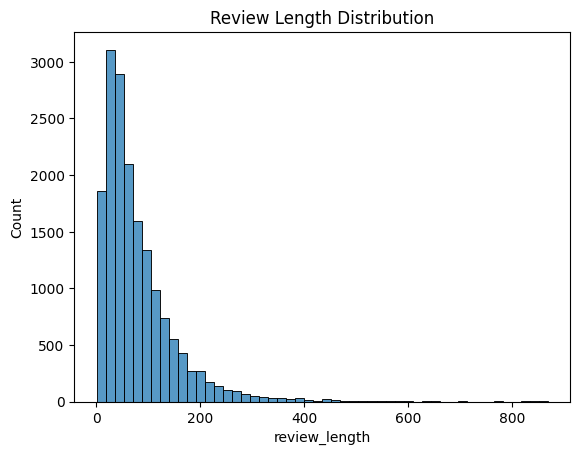

In [70]:
# Analyze the length of reviews
df['review_length'] = df['Reviews'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()

In [71]:
# Display the distribution of review lengths
print(df['review_length'].describe())

count    16990.000000
mean        78.827899
std         71.166061
min          1.000000
25%         31.000000
50%         58.000000
75%        103.750000
max        869.000000
Name: review_length, dtype: float64


In [72]:
import nltk

# Download the WordNet data
nltk.download('wordnet')

# Additionally, download 'omw-1.4' which is needed for lemmatization
nltk.download('omw-1.4')

# If you're tokenizing, you might also need to download 'punkt'
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df.columns

Index(['Sentiments', 'Reviews', 'review_length'], dtype='object')

In [74]:
# Define the preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Handle emojis (optional)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    text = text.lower()

    # Remove all single characters from the start of comments
    text = re.sub(r'\b\w\b', '', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove prefixed 'b'
    text = re.sub(r'\bb\b', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]

    return ' '.join(words)

# Apply preprocessing to the 'Reviews' column of your existing DataFrame
df['cleaned_review'] = df['Reviews'].apply(preprocess_text)

# Display the updated DataFrame with 'Sentiments', 'Reviews', and 'cleaned_review'
print(df.head())

  Sentiments                                            Reviews  \
0   negative  Stuff and design was totally changed. cheap qu...   
1   positive  i got my parxel before time,sorry for late rev...   
2   positive  So far so good..... Bought it only because it ...   
3    neutral  Received as described but not suitable such ha...   
4   positive  Received on time and in a safely packed box. T...   

   review_length                                     cleaned_review  
0             67  stuff design wa totally changed cheap quality ...  
1            129  got parxel timesorry late reviewbut cap amazin...  
2            196  far good bought ha name makute big fan product...  
3             73  received described suitable hard thing ear cle...  
4            214  received time safely packed box product way be...  


In [75]:
df.columns

Index(['Sentiments', 'Reviews', 'review_length', 'cleaned_review'], dtype='object')

#Splitting the dataset into training (80%) and testing (20%) sets

In [78]:
df.head()

,Sentiments,Reviews,review_length,cleaned_review
0,negative,Stuff and design was totally changed. cheap qu...,67,stuff design wa totally changed cheap quality ...
1,positive,"i got my parxel before time,sorry for late rev...",129,got parxel timesorry late reviewbut cap amazin...
2,positive,So far so good..... Bought it only because it ...,196,far good bought ha name makute big fan product...
3,neutral,Received as described but not suitable such ha...,73,received described suitable hard thing ear cle...
4,positive,Received on time and in a safely packed box. T...,214,received time safely packed box product way be...


In [79]:
X = df['cleaned_review']
y= df['Sentiments']

#Splitting the dataset into training (80%) and testing (20%) sets

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3,
test_size=0.2,random_state=42)
for train_index, test_index in sss.split(X, y):
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#Feature Extraction


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert text to a matrix of token counts
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Training Model


In [109]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score

# List of models to evaluate
models = {
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracy scores for each model
model_accuracies = {}

# Train each model and calculate accuracy
for name, model in models.items():
    print(f"Training {name}...")

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

    # Fit model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred_val = model.predict(X_test)

    # Accuracy score on the test set
    accuracy = accuracy_score(y_test, y_pred_val)

    # Store the accuracy score
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"\nThe best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


Training SGD Classifier...
SGD Classifier Accuracy: 0.8308
Training Logistic Regression...
Logistic Regression Accuracy: 0.8317
Training Random Forest...
Random Forest Accuracy: 0.8102
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7837
Training AdaBoost...
AdaBoost Accuracy: 0.7519
Training Support Vector Classifier...
Support Vector Classifier Accuracy: 0.8314
Training Decision Tree...
Decision Tree Accuracy: 0.7593
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.7478

The best model is: Logistic Regression with an accuracy of 0.8317


Models and their accuracies: {'SGD Classifier': 0.8307828134196587, 'Logistic Regression': 0.8316656856974691}


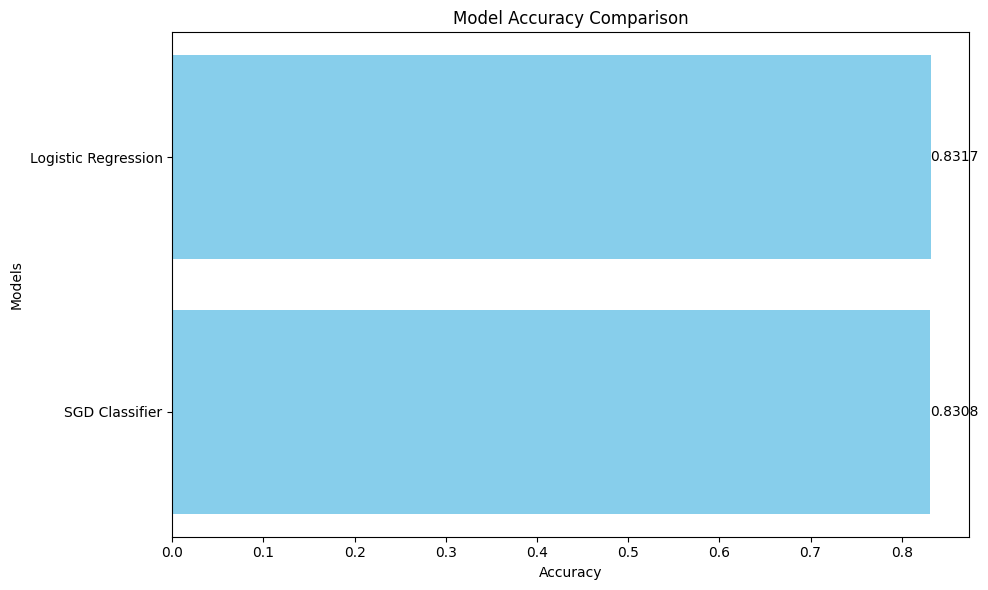

In [120]:
import matplotlib.pyplot as plt

# Check if all models are present in model_accuracies
print("Models and their accuracies:", model_accuracies)

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))

# Plot the accuracies
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

# Add accuracy values next to each bar
for index, (name, accuracy) in enumerate(model_accuracies.items()):
    plt.text(accuracy, index, f'{accuracy:.4f}', va='center')

# Display the plot
plt.tight_layout()
plt.show()


#Cross-Validation Classification Report


In [123]:
from sklearn.metrics import classification_report

# Assuming you have the Logistic Regression model stored in the `models` dictionary
log_reg_model = models['Logistic Regression']

# Predict on the test set using the best model (Logistic Regression)
y_pred_log_reg = log_reg_model.predict(X_test)

# Generate the classification report
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print the classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(report_log_reg)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.83      0.81      0.82       872
     neutral       0.63      0.41      0.50       492
    positive       0.86      0.94      0.90      2034

    accuracy                           0.83      3398
   macro avg       0.77      0.72      0.74      3398
weighted avg       0.82      0.83      0.82      3398



#Validation Set Classification Report


In [124]:
from sklearn.metrics import classification_report

# Assuming you have the Logistic Regression model already trained
log_reg_model = models['Logistic Regression']

# Predict on the test/validation set using the Logistic Regression model
y_pred_log_reg_val = log_reg_model.predict(X_test)

# Generate the classification report for validation set predictions
report_log_reg_val = classification_report(y_test, y_pred_log_reg_val)

# Print the classification report for Logistic Regression on the validation set
print("Classification Report for Logistic Regression (Validation Set):")
print(report_log_reg_val)


Classification Report for Logistic Regression (Validation Set):
              precision    recall  f1-score   support

    negative       0.83      0.81      0.82       872
     neutral       0.63      0.41      0.50       492
    positive       0.86      0.94      0.90      2034

    accuracy                           0.83      3398
   macro avg       0.77      0.72      0.74      3398
weighted avg       0.82      0.83      0.82      3398



In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg_val))


Confusion Matrix:
[[ 710   49  113]
 [  95  202  195]
 [  50   70 1914]]


#Logistic Regression Learning Curve:

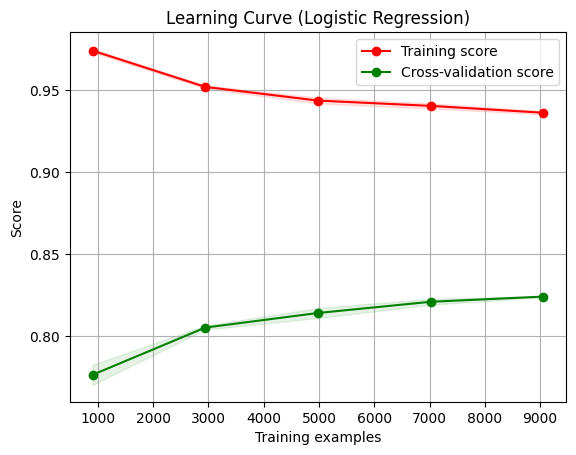

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add legend and show plot
    plt.legend(loc="best")
    return plt

# Logistic Regression model (best model based on accuracy)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Plot learning curve for Logistic Regression
plot_learning_curve(log_reg, "Learning Curve (Logistic Regression)", X_train, y_train, cv=3)
plt.show()


#Logistic Regression ROC Curve:

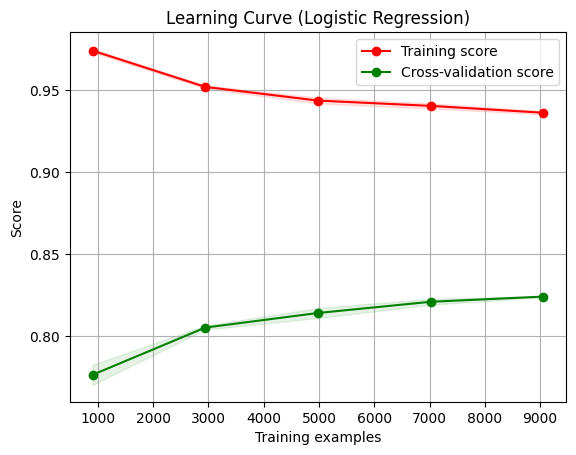

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add legend and show plot
    plt.legend(loc="best")
    return plt

# Logistic Regression model (best model based on accuracy)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Plot learning curve for Logistic Regression
plot_learning_curve(log_reg, "Learning Curve (Logistic Regression)", X_train, y_train, cv=3)
plt.show()


#Logistic Regression (Precision, Recall, and F1-Score):

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)  # Fit the model with training data

# Step 2: Predict on the validation/test set
y_pred_log_reg_val = log_reg.predict(X_test)

# Step 3: Precision, Recall, and F1-Score (weighted average)
precision = precision_score(y_test, y_pred_log_reg_val, average='weighted')
recall = recall_score(y_test, y_pred_log_reg_val, average='weighted')
f1 = f1_score(y_test, y_pred_log_reg_val, average='weighted')

# Step 4: Print the results
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Precision: 81.98%
Recall: 83.17%
F1-Score: 82.13%


#Logistic Regression ROC Curve (Multiclass):

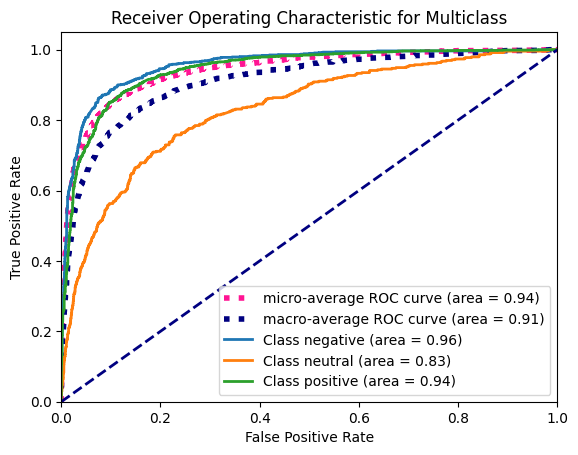

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming y_train and y_test are your labels
classes = np.unique(y_train)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Train the One-vs-Rest Logistic Regression classifier
log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)
ovr_clf = OneVsRestClassifier(log_reg_clf)
ovr_clf.fit(X_train, y_train_bin)

# Compute ROC curve and ROC area for each class
y_score = ovr_clf.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


#Logistic Regression (Precision-Recall Curve):

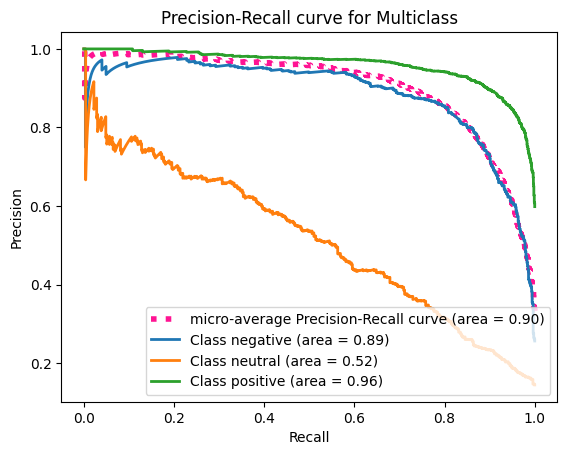

In [133]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming the Logistic Regression model has been trained in a One-vs-Rest scheme
# y_test_bin: Binarized y_test for multiclass
# y_score: Decision function from One-vs-Rest Logistic Regression

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Compute micro-average Precision-Recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

# Plot Precision-Recall curve for each class
plt.figure()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-Recall curve (area = {0:0.2f})'.format(average_precision["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


#Confusion Matrix with Logistic Regression:

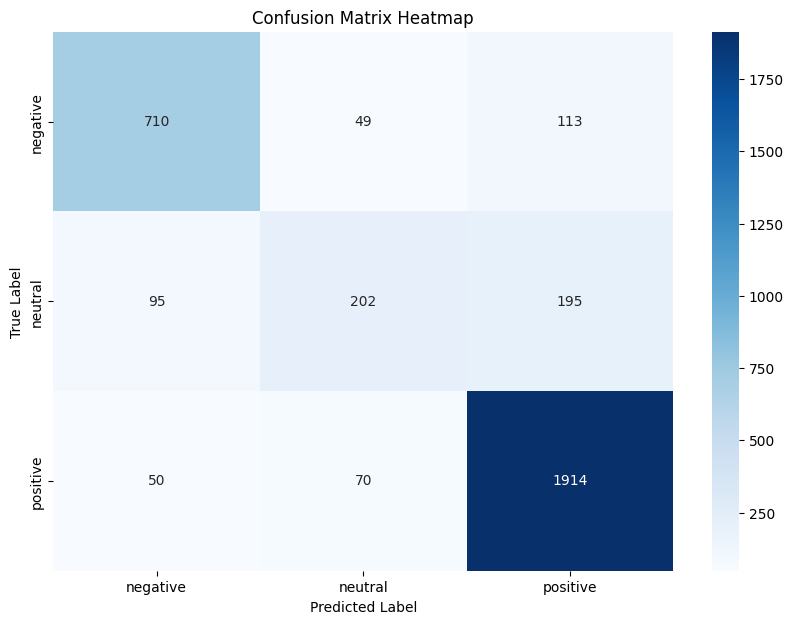

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Logistic Regression predictions
y_pred_log_reg_val = log_reg.predict(X_test)  # Logistic Regression predictions

# Ensure that both true and predicted labels are strings (if they are categorical like 'neutral', 'positive', 'negative')
y_test_labels = y_test  # Assuming y_test is already in the string format ('neutral', 'positive', 'negative')
y_pred_labels = y_pred_log_reg_val  # No conversion to integers

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
